In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# data_dir = '../data'
data_dir = data_dir = '/content/gdrive/MyDrive/530proj_me/Liar-Plus'
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set(font_scale=1.2)

In [3]:
def preprocessing(train=False, eval=False, test=False):
  cols = ['id','label','statement','subject','speaker','job_title','state_info',
          'party_affiliation','barely_true_counts','false_counts',
          'half_true_counts','mostly_true_counts','pants_on_fire_counts',
          'context','justification']
  label_dict = {"false" : 0, "half-true" : 1, "mostly-true" : 2, "true": 3, "barely-true" : 4, "pants-fire" : 5 } 
  def get_label(x):
    if x not in label_dict:
      return 1
    return label_dict[x]
  if train:
    dst_path = os.path.join(data_dir,'train2.tsv')
  if eval:
    dst_path = os.path.join(data_dir,'val2.tsv')
  if test:
    dst_path = os.path.join(data_dir,'test2.tsv')
  current_dataset = pd.read_csv(dst_path, sep='\t', header = None, names=cols)
  current_dataset['label_'] = current_dataset['label'].apply(lambda x: get_label(x))
  current_dataset.reset_index(drop=True,inplace=True)
  return current_dataset
train_dataset = preprocessing(train=True)
dev_dataset = preprocessing(eval=True)
test_dataset = preprocessing(test=True)

In [ ]:
# dev_dataset['label']
lab = ["true", "mostly-true", "half-true", "barely-true", "false","pants-fire"]
for dst in [train_dataset, dev_dataset, test_dataset]:
  print('--------------')
  for l in lab:
    print(l,len(dst[dst['label']==l])/len(dst))

--------------
true 0.16363991407928138
mostly-true 0.19156414762741653
half-true 0.2064049990236282
barely-true 0.16149189611404022
false 0.19478617457527828
pants-fire 0.08191759421987893
--------------
true 0.13161993769470404
mostly-true 0.1954828660436137
half-true 0.19314641744548286
barely-true 0.18457943925233644
false 0.20482866043613707
pants-fire 0.09034267912772585
--------------
true 0.16416732438831885
mostly-true 0.19021310181531176
half-true 0.2091554853985793
barely-true 0.16732438831886345
false 0.19652722967640096
pants-fire 0.07261247040252565


In [6]:
# for dst in [train_dataset, dev_dataset, test_dataset]:
true_labels = dev_dataset['label']
pred_y = ['false' for i in range(len(true_labels))]
from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(pred_y,true_labels)#, f1_score(y_pred,y_true)
mf1 = f1_score(pred_y,true_labels,average='macro')
print('acc: ', acc,'Micro f1',mf1)

true_labels = test_dataset['label']
pred_y = ['half-true' for i in range(len(true_labels))]
from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(pred_y,true_labels)#, f1_score(y_pred,y_true)
mf1 = f1_score(pred_y,true_labels,average='macro')
print('acc: ', acc,'Micro f1',mf1)

acc:  0.20482866043613707 Micro f1 0.05666882137470372
acc:  0.2091554853985793 Micro f1 0.057658833768494344


In [ ]:
train_dataset.groupby(['label']).sum()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,label_
label,,,,,,
barely-true,19402.0,20547.0,24488.0,23080.0,8898.0,6616
false,23129.0,31446.0,29903.0,27499.0,15742.0,0
half-true,25048.0,26569.0,41420.0,38493.0,9515.0,2114
mostly-true,23202.0,24095.0,38795.0,40436.0,7402.0,3924
pants-fire,9271.0,15238.0,9713.0,7712.0,16697.0,4195
true,18025.0,18132.0,31096.0,31034.0,5236.0,5028


In [ ]:
from collections import Counter
# Counter(train_dataset['label'])['true']
col_cnt = Counter(train_dataset['job_title'])
col_cnt = sorted(col_cnt.items(), key = lambda kv: kv[1], reverse=True)
col_cnt = col_cnt[:20]
col_cnt = {'President': 492+273+254, 'U.S. Senator':479+263,'Governor':391}
# col_cnt = {k:v for (k,v) in col_cnt if str(k)!='nan'}
col_cnt
lab = ["true", "mostly-true", "half-true", "barely-true", "false","pants-fire"]
# lab.index('false')
# train_dataset.columns

4

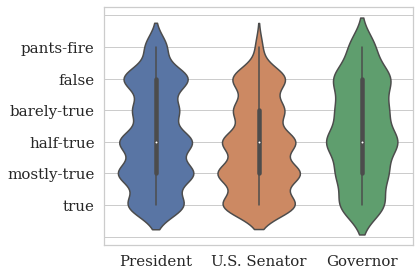

In [ ]:
lab = ["true", "mostly-true", "half-true", "barely-true", "false","pants-fire"]
col_cnt = {'President': 492+273+254, 'U.S. Senator':479+263,'Governor':391}
all_title = ['President', 'President-Elect','Presidential candidate','U.S. Senator','U.S. senator','Governor']
tmp = train_dataset
title, labelidx = [],[]
for i in range(len(tmp)):
  t = tmp['job_title'][i]
  l = tmp['label'][i]
  if t not in all_title or l not in lab:
    continue
  if t in ['President', 'President-Elect','Presidential candidate']:
    t = 'President'
  elif t in ['U.S. Senator','U.S. senator']:
    t = 'U.S. Senator'
  title.append(t)
  labelidx.append(lab.index(l))

tmp = pd.DataFrame({'label':labelidx,'Title':title}) #
ax = sns.violinplot(x="Title", y="label", data=tmp)
ax.set_xlabel('',fontsize = 20)
ax.set_ylabel('',fontsize = 20)
ax.set_title('', fontsize=10)
for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(15) 
for tick in ax.yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(15) 
ax.set_yticklabels(["","","true", "mostly-true", "half-true", "barely-true", "false","pants-fire",""])
plt.tight_layout()
plt.show()

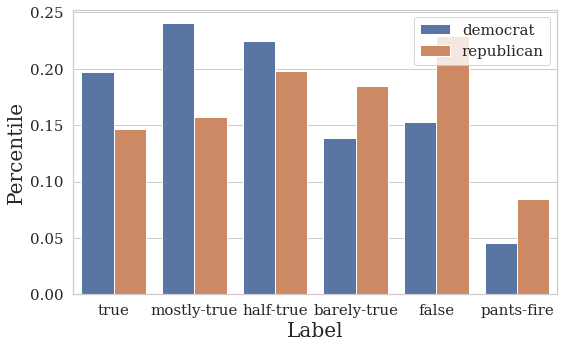

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# lab=[i for i in list(set(train_dataset['label'])) if str(i)!='nan']
lab = ["true", "mostly-true", "half-true", "barely-true", "false","pants-fire"]
tmpl, tmpp, tmpc = [], [],[]
for l in lab:
  for p in ['democrat','republican']:
    cnt = len(train_dataset[(train_dataset['label']==l) & (train_dataset['party_affiliation']==p)])
    if p=='republican':
      cnt=cnt/4497
    else:
      cnt = cnt/3336
    tmpc.append(cnt)
    tmpp.append(p)
    tmpl.append(l)
# tmpc = [Counter(train_dataset['label'])[i] for i in tmpl]
tmp = pd.DataFrame({'label':tmpl,'Party':tmpp,'Count':tmpc})
tmp
plt.figure(figsize=(8,5))
ax = sns.barplot(x="label",y='Count',hue='Party', data=tmp)
ax.set_xlabel('Label',fontsize = 20)
ax.set_ylabel('Percentile',fontsize = 20)
ax.set_title('', fontsize=10)
for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(15) 
for tick in ax.yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(15) 
ax.legend(fontsize=15)
plt.tight_layout()
plt.show()

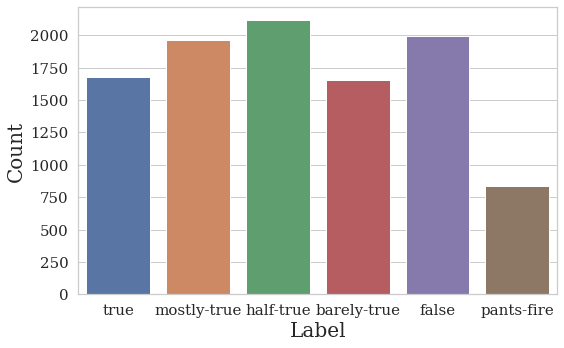

In [ ]:
# tmpl=[i for i in list(set(train_dataset['label'])) if str(i)!='nan']
tmpl=["true", "mostly-true", "half-true", "barely-true", "false","pants-fire"]
tmpc = [Counter(train_dataset['label'])[i] for i in tmpl]
tmp = pd.DataFrame({'label':tmpl,'Count':tmpc})
tmp
plt.figure(figsize=(8,5))
ax = sns.barplot(x="label",y='Count', data=tmp)
ax.set_xlabel('Label',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_title('', fontsize=10)
for tick in ax.xaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(15) 
for tick in ax.yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(15) 
plt.tight_layout()
plt.show()

In [ ]:
ax = sns.barplot(x="label", y="(cnt)", hue="party", data=tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


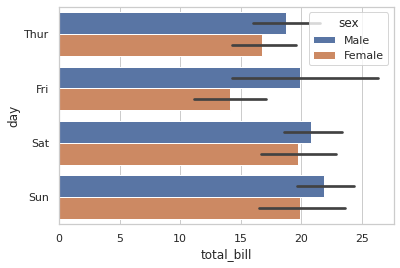

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
print(tips)
ax = sns.barplot(y="day", x="total_bill", hue="sex", data=tips)
